In [42]:
import pandas as pd
import matplotlib.pyplot as plt

#saled data를 변수명 saleslog에 할당
#saleslog=pd.read_csv("C:\\Users\\오순정\\aifell\\node\\221103")
saleslog=pd.read_csv('~/aifell/node/221103/Sales.csv')
saleslog

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325
...,...,...,...,...,...,...
99840,2022-03-27,2022-03-27,SoccerManager,install,0,dicta630
99841,2022-03-28,2022-03-28,SoccerManager,install,0,tempora976
99842,2022-03-26,2022-03-26,SoccerManager,install,0,iusto840
99843,2022-03-20,2022-03-20,SoccerManager,install,0,nemo273


In [43]:
#1월부터 3월까지 결제 금액 총액 계산하기
saleslog['Payment'].sum()

144443100

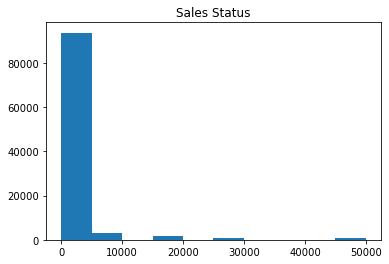

In [44]:
# 결제 금액을 히스토그램으로 그리기
plt.hist(saleslog['Payment'])
plt.title('Sales Status')
plt.show()

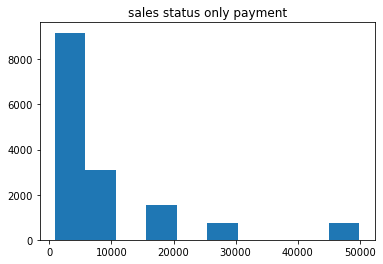

In [45]:
#대부분 만원이하로 결제 

#결제금액이 0원이 아닌 무과금 유저 제외하고 변수에 할당
sales=saleslog[saleslog['Payment']!=0]

#결제 금액으로 히스토그램 그리기
plt.hist(sales['Payment'])
plt.title('sales status only payment')
plt.show()

In [46]:
#box plot을 통한 결제 금액의 사분위수

#결제금액의 기술통계량 확인
sales['Payment'].describe()

count    15309.000000
mean      9435.175387
std      11897.228643
min        900.000000
25%        900.000000
50%       4900.000000
75%       9900.000000
max      49900.000000
Name: Payment, dtype: float64

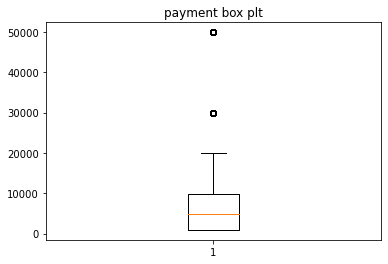

In [47]:
plt.boxplot(sales['Payment'])
plt.title('payment box plt')
plt.show()

최솟값이 900, 최댓값이 49900, 평균결제금액 9435


In [48]:
sales['Payment'].value_counts()/len(sales['Payment'])

900      0.350709
4900     0.248677
9900     0.201581
19900    0.100856
29900    0.050036
49900    0.048142
Name: Payment, dtype: float64

실제 900운 결제 건수 전체 35퍼
4900원 결제 ㅈ건수 약 24퍼
둘이 합치면 약 70퍼

In [49]:
#월별 결제 금액 
#groupby() 함수 사용 - ppandss 데이터 프레임 중 특정열을 기준으로 집계

saleslog=saleslog.copy()
saleslog['Month']=saleslog['Time_stamp'].str[:7]

#워별 결제금액 확인
saleslog['Payment'].groupby(saleslog['Month']).sum()

Month
2022-02    80841800
2022-03    63601300
Name: Payment, dtype: int64

In [50]:
#2월에 비해 3월이 줄음 

temp_data = saleslog['Payment'].groupby(saleslog['Month']).sum()
temp_data

Month
2022-02    80841800
2022-03    63601300
Name: Payment, dtype: int64

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

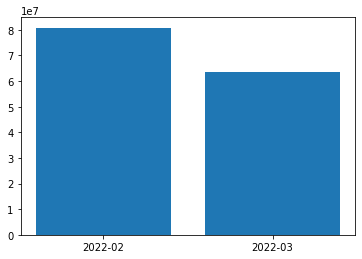

In [52]:
ax = plt.bar(temp_data.index, temp_data)
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('Payments by Month')
plt.show()

In [61]:
#sales02 벼ㄴ수를 만들고 2월에 결제한 데이터 할당, 무과금 제외
sales2 = saleslog[(saleslog['Month'] == '2022-02')& (saleslog['Payment'] != 0)]
sales2

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02
...,...,...,...,...,...,...,...
12168,2022-02-12,2022-02-14,SoccerManager,play,4900,quam946,2022-02
12169,2022-02-10,2022-02-14,SoccerManager,play,4900,commodi507,2022-02
12170,2022-02-16,2022-02-21,SoccerManager,play,900,rerum275,2022-02
12171,2022-02-16,2022-02-20,SoccerManager,play,9900,quo151,2022-02


In [62]:
#시각화를 위한 인덱스 정렬
sales2.reset_index(drop=True)

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02
...,...,...,...,...,...,...,...
8537,2022-02-12,2022-02-14,SoccerManager,play,4900,quam946,2022-02
8538,2022-02-10,2022-02-14,SoccerManager,play,4900,commodi507,2022-02
8539,2022-02-16,2022-02-21,SoccerManager,play,900,rerum275,2022-02
8540,2022-02-16,2022-02-20,SoccerManager,play,9900,quo151,2022-02


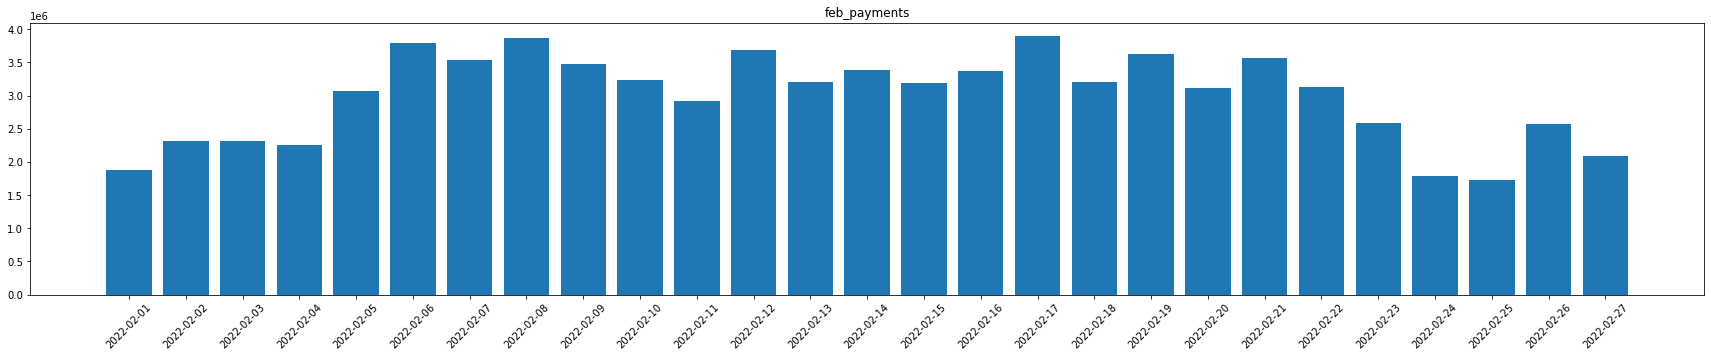

In [63]:
#2월에 결제한 데이터 날짜순 정렬, 막대그래프 그려봄
temp_data=sales2['Payment'].groupby(sales2['Time_stamp']).sum()
plt.figure(figsize=(30,5))
plt.bar(temp_data.index, temp_data)
plt.title('feb_payments')
plt.xticks(rotation=45)
plt.show()

In [65]:
#3월에 결제한 데이터 시각화
sales3=saleslog[(saleslog['Month']=='2022-03')&(saleslog['Payment']!=0)]
sales3

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month
4318,2022-01-13,2022-03-14,MineGround,play,900,quod578,2022-03
4319,2022-02-08,2022-03-21,MineGround,play,9900,saepe705,2022-03
4320,2022-01-24,2022-03-20,MineGround,play,19900,voluptates561,2022-03
4321,2022-02-05,2022-03-18,MineGround,play,9900,quaerat318,2022-03
4322,2022-01-19,2022-03-24,MineGround,play,4900,perspiciatis026,2022-03
...,...,...,...,...,...,...,...
15304,2022-03-21,2022-03-25,SoccerManager,play,9900,a329,2022-03
15305,2022-03-18,2022-03-20,SoccerManager,play,9900,dignissimos737,2022-03
15306,2022-03-17,2022-03-20,SoccerManager,play,900,sequi289,2022-03
15307,2022-03-13,2022-03-16,SoccerManager,play,4900,delectus499,2022-03


In [66]:
#시각화를 위한 인덱스 정렬
sales3.reset_index(drop=True)

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month
0,2022-01-13,2022-03-14,MineGround,play,900,quod578,2022-03
1,2022-02-08,2022-03-21,MineGround,play,9900,saepe705,2022-03
2,2022-01-24,2022-03-20,MineGround,play,19900,voluptates561,2022-03
3,2022-02-05,2022-03-18,MineGround,play,9900,quaerat318,2022-03
4,2022-01-19,2022-03-24,MineGround,play,4900,perspiciatis026,2022-03
...,...,...,...,...,...,...,...
6762,2022-03-21,2022-03-25,SoccerManager,play,9900,a329,2022-03
6763,2022-03-18,2022-03-20,SoccerManager,play,9900,dignissimos737,2022-03
6764,2022-03-17,2022-03-20,SoccerManager,play,900,sequi289,2022-03
6765,2022-03-13,2022-03-16,SoccerManager,play,4900,delectus499,2022-03


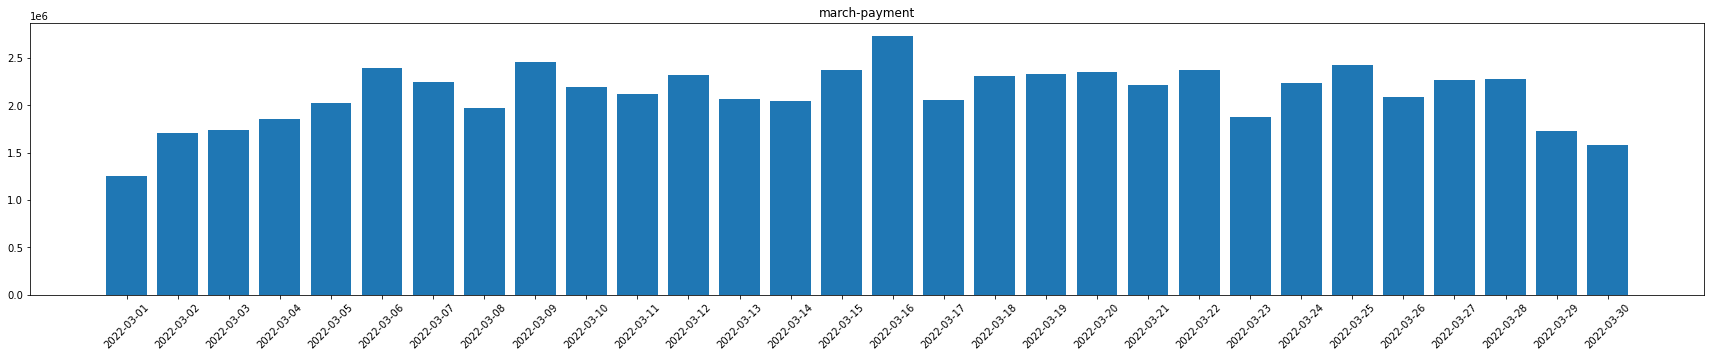

In [67]:
#3월에 결제한 데이터 시각화
temp_data1=sales3['Payment'].groupby(sales3['Time_stamp']).sum()
plt.figure(figsize=(30,5))
plt.bar(temp_data1.index,temp_data1)
plt.title('march-payment')
plt.xticks(rotation=45)
plt.show()

#### 커스텀 데이터로 확인

In [68]:
customerlog=pd.read_csv('~/aifell/node/221103/customer.csv')
print(customerlog)

customerlog.info()

          Customer_ID Name     Nickname  Password  \
0          facilis140  이영순         quos  ********   
1          debitis994  김중수    molestiae  ********   
2         possimus246  양은경          rem  ********   
3        occaecati138  백도윤       libero  ********   
4         corrupti325  김영수   temporibus  ********   
...               ...  ...          ...       ...   
99840        dicta630  김예지          sit  ********   
99841      tempora976  문은경         modi  ********   
99842        iusto840  강중수        iusto  ********   
99843         nemo273  황정남     deleniti  ********   
99844  consequatur371  이영식  accusantium  ********   

                              Email       Birth  Gender              C.P.  \
0                   coejongsu@yu.kr  1989-03-11  female  01x9-4x625-x5x3x   
1                   jiweon02@ju.org  1995-11-19    male  01x9-3x228-x3x9x   
2           coesubin@jusighoesa.com  2005-12-24  female  01x9-7x873-x2x2x   
3            yeongceol80@gangryu.kr  2003-02-09  female

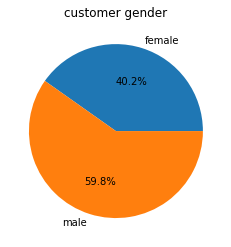

In [74]:
#고객 성별에 따른 파이그래프 그리기
pie_data=customerlog.groupby(['Gender']).count().Name
plt.pie(pie_data,labels=pie_data.index,autopct='%1.1f%%')
plt.title('customer gender')
plt.show()

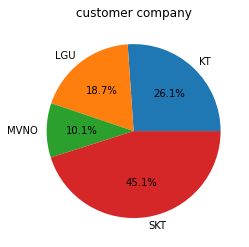

In [77]:
#고객 모바일 서비스 기업에 따른 파잉 그래프

pi_data=customerlog.groupby(['MobileCompany']).count().Name
plt.pie(pi_data,labels=pi_data.index,autopct='%1.1f%%')
plt.title('customer company')
plt.show()

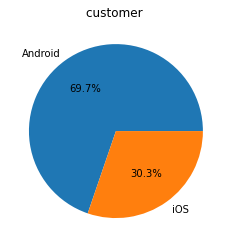

In [79]:
#고객 모바일 os에 따른 파잉 그래프

pi_data=customerlog.groupby(['OS']).count().Name
plt.pie(pi_data,labels=pi_data.index,autopct='%1.1f%%')
plt.title('customer ')
plt.show()

### 결제경험이 있는 고객 시각화

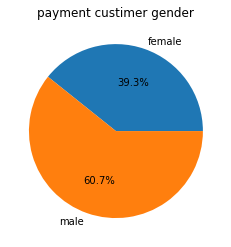

In [82]:
#customer 데이터와 sales 데이터 결합

totaldata=pd.merge(customerlog,saleslog)

#결제 경험이 있는 고객들만 골라내기
paymentcustomer=totaldata[(totaldata['Payment'] !=0)]

#결제 경험이 있는 고객 성별에 다른 파이그래프 그리기
pie_data=paymentcustomer.groupby(["Gender"]).count().Name
plt.pie(pie_data,labels=pie_data.index,autopct='%1.1f%%')
plt.title('payment custimer gender')
plt.show()

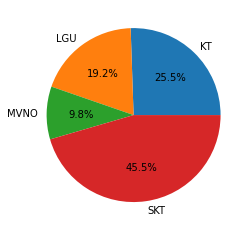

In [83]:
#결제 경험이 있는 고객 모바일 서비스 기업에 따른 파이 그래프 
pie_data=paymentcustomer.groupby(['MobileCompany']).count().Name
plt.pie(pie_data,labels=pie_data.index,autopct='%1.1f%%')
plt.show()

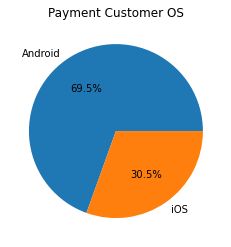

In [84]:
# 결제 경험이 있는 고객 모바일OS에 따른 파이그래프 그리기
pie_data = paymentcustomer.groupby(['OS']).count().Name
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Payment Customer OS')
plt.show()

#### 고객 성별에 따른 결제금액 월별 관찰

In [87]:
paymentcustomer['Payment'].groupby([paymentcustomer['Gender'],paymentcustomer['Month']]).sum()


Gender  Month  
female  2022-02    32103200
        2022-03    25295700
male    2022-02    48738600
        2022-03    38305600
Name: Payment, dtype: int64

In [88]:
male=paymentcustomer[paymentcustomer['Gender']=='male']
female=paymentcustomer[paymentcustomer['Gender']=='female']

In [92]:
#월별 여성 고객 결ㅈ제 금액 시각화
temp_data=female['Payment'].groupby(female['Month']).sum()
ax=plt.bar(temp_data.index,temp_data)
ple.bar_label(ax,labels=[f '{x:,.0f}' for x in ax.datavalues],label_type='center')
plt.title('payment by female')
plt.show()

SyntaxError: invalid syntax (<ipython-input-92-d383312036cf>, line 4)

#### 5-2 노드 데이터 분석

In [95]:
#pandsa numpy matplotlib seaborn 호출

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

In [96]:
#sales data 변슈를 만들고 각 데이터 값을 할당
sales_data=pd.read_csv('~/aifell/node/221103/sales_6.csv')

sales_data.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325


In [103]:
#월별 게임 설치/플레이 횟수

sales_data['date']=sales_data['Time_stamp'].str[:7]
sales_data.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02


In [105]:
sales_data['date'].value_counts()

2022-03    50465
2022-02    49380
Name: date, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

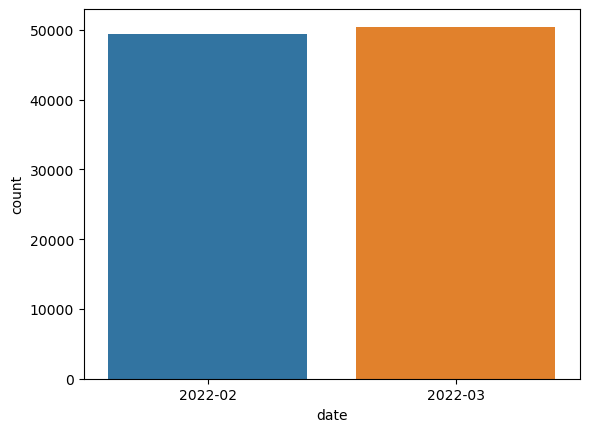

In [109]:
# 월별 고객 수 현황 시각화하기
ax = sns.countplot(data=sales_data, x='date')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
containers0 = ax.containers[-1]
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer By Month')

plt.show()

In [113]:
#월별 각 게임 고객수 분류하기
grouped=sales_data['Status'].groupby([sales_data['date'],sales_data['Game_Name']]).count()
grouped

date     Game_Name    
2022-02  MineGround       27721
         SoccerManager    21659
2022-03  MineGround       32192
         SoccerManager    18273
Name: Status, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

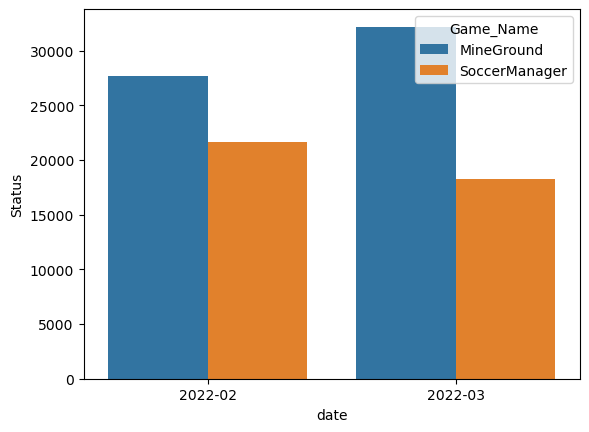

In [115]:
#매출은 줄었지만 고객이 늘음

#월별 고객 수 시각화하기

ax=sns.barplot(data=grouped.reset_index(),x='date',y='Status',hue='Game_Name')

containers=ax.containers[-1]
containers0=ax.containers[0]
ax.bar_label(containers,labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0,labels=[f'{x:,.0f}' for x in containers0.datavalues],label_type='center')
plt.title("customer count by game")
plt.show()

In [118]:
#mine ground 게임 고객은 증가
#source manager 고객은 감소

#게임을 플레이한 고객과 설치한 고객 분류
sales_data['Status'].value_counts()

play       84821
install    15024
Name: Status, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

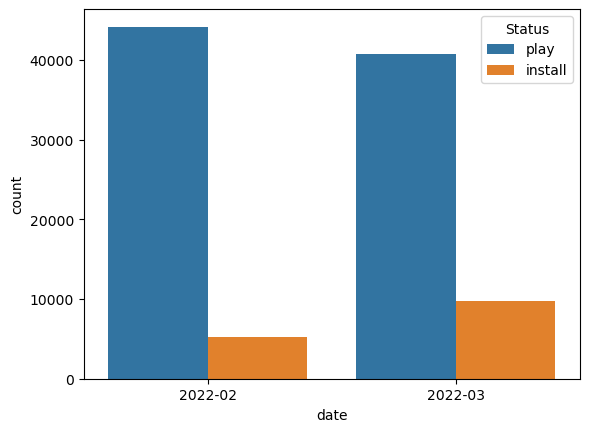

In [120]:
ax=sns.countplot(data=sales_data,x='date',hue='Status')

containers=ax.containers[-1]
containers0=ax.containers[0]
ax.bar_label(containers,labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0,labels=[f'{x:,.0f}' for x in containers0.datavalues],label_type='center')
plt.title("customer  by real play")
plt.show()

인스톨한 고객은 늘어낫지만 플렝한 고객은 감소

In [121]:
#월별 결제 수
temp_data=sales_data[sales_data['Payment']!=0]
temp_data['date'].value_counts()

2022-02    8542
2022-03    6898
Name: date, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bae_label'

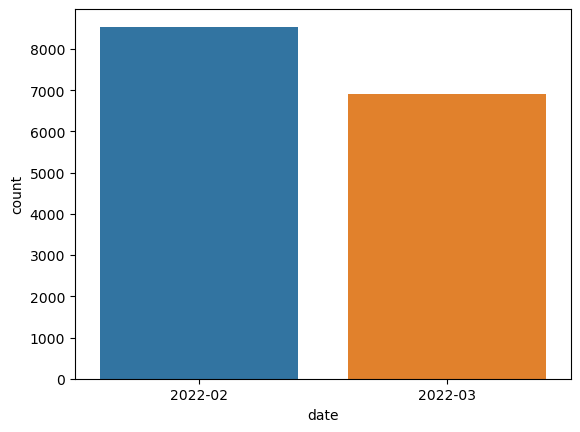

In [122]:
#월별 결제 횟수 시각화
ax=sns.countplot(data=temp_data,x='date')
containers=ax.containers[0]
ax.bae_label(containers,labels=[f'{x:,.0f}' for x in containers.datavalues],label_type='center')
plt.title('payment counts iby month')
plt.show()

In [123]:
# 결제 갯수 떨어짐

#각 게임별 결제 건수 확인
grouped=temp_data['Payment'].groupby([temp_data['date'],temp_data['Game_Name']]).count()
grouped

date     Game_Name    
2022-02  MineGround       4318
         SoccerManager    4224
2022-03  MineGround       3762
         SoccerManager    3136
Name: Payment, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

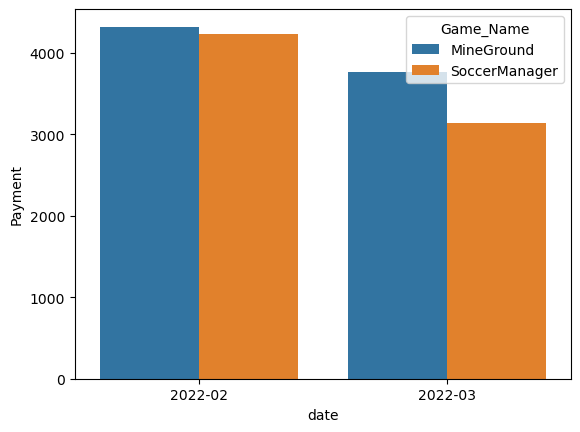

In [125]:
#각 게임별 결제 건수 시각화
ax=sns.barplot(data=grouped.reset_index(), x='date', y='Payment', hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Payment Count By Game')
plt.show()

In [127]:
#각 게임별 결제 금액 
grouped=temp_data['Payment'].groupby([temp_data['date'],temp_data['Game_Name']]).sum()
grouped

date     Game_Name    
2022-02  MineGround       42114200
         SoccerManager    38727600
2022-03  MineGround       38722800
         SoccerManager    29638400
Name: Payment, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

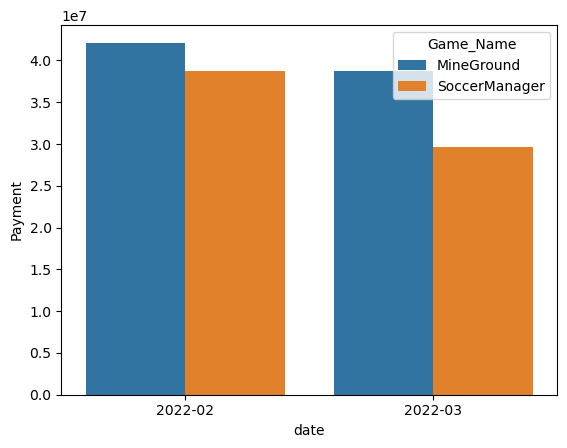

In [129]:
ax=sns.barplot(data=grouped.reset_index(), x='date', y='Payment', hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Payment Count By Game')
plt.show()

In [131]:
#매출에 영향을 주ㅡㄴ 고객 정의

#player_data 변수를 만ㄴ들고 play 고객만 골라내기
player_data=sales_data[sales_data['Status']=='play']
player_data

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02
...,...,...,...,...,...,...,...
84816,2022-03-06,2022-03-11,SoccerManager,play,0,sed821,2022-03
84817,2022-03-20,2022-03-23,SoccerManager,play,0,minima581,2022-03
84818,2022-03-25,2022-03-27,SoccerManager,play,0,harum162,2022-03
84819,2022-03-15,2022-03-18,SoccerManager,play,0,eveniet498,2022-03


In [133]:
#신규 고객과 기존 고객 구분
player_data=player_data.copy()
player_data['install_date']=player_data['install'].str[:7]
player_data['play_date']=player_data['Time_stamp'].str[:7]

In [135]:
#인스톨한 시기와 플레이한 시기가 같으면 신규고객
#인스톨한 시기와 플레이 시기가 다르면 기존 고객

player_data['type']=np.where(player_data['install_date']==player_data['play_date'],'New_player','Existing')

In [136]:
grouped=player_data['Status'].groupby([player_data['play_date'],player_data['type']]).count()
grouped

play_date  type      
2022-02    Existing      28668
           New_player    15480
2022-03    Existing      28207
           New_player    12466
Name: Status, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

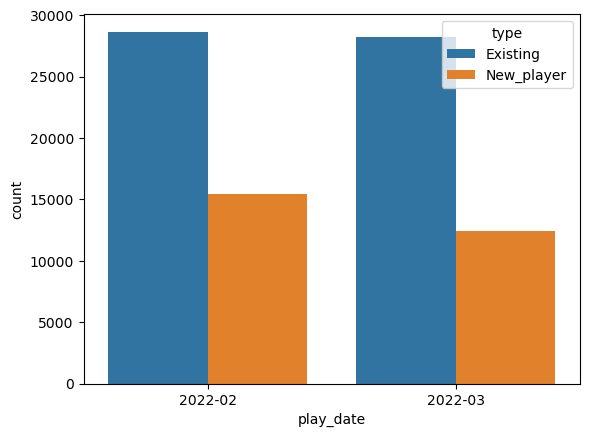

In [137]:
# 월별 신규 고객과 기존 고객 현황 시각화하기
ax = sns.countplot(data=player_data, x='play_date', hue="type")

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer Type By Month')

플레이 인원이 줄고 잇음

In [139]:
#월별 신규 고객과 기존 고객의 결제 현황

grouped=player_data['Payment'].groupby([player_data['play_date'],player_data['type']]).sum()
grouped

play_date  type      
2022-02    Existing      50140500
           New_player    30701300
2022-03    Existing      50140500
           New_player    18220700
Name: Payment, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

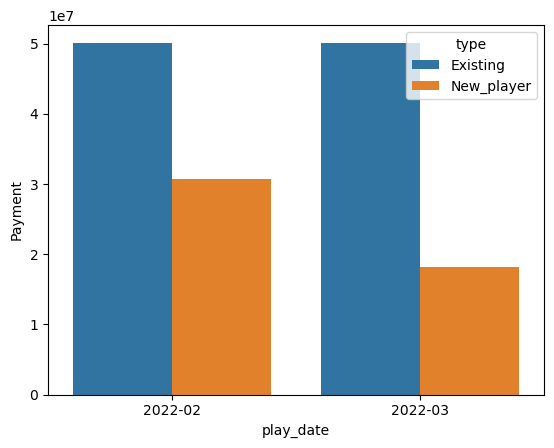

In [140]:
# 각 게임별 결제 금액 월별 시각화하기
ax = sns.barplot(data=grouped.reset_index(), x='play_date', y='Payment', hue='type')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer Type By Month')
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

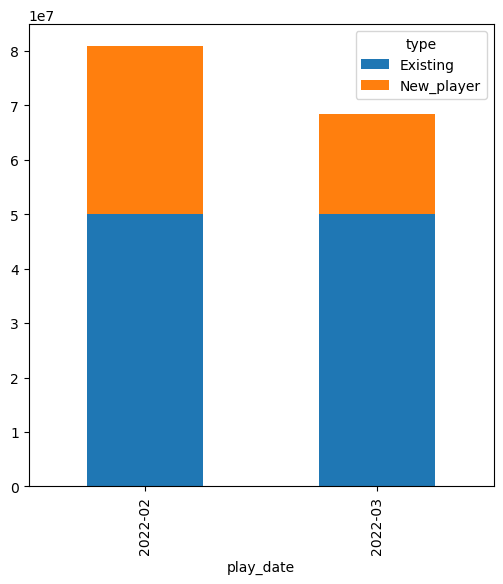

In [141]:
#월별 신규 고객과 기존 고객의 결제 현황 시각화하기(누적막대 보기)
ax = grouped.unstack().plot(kind='bar', stacked=True, grid=False, figsize=[6,6])

containers = ax.containers[-1]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
containers0 = ax.containers[-2]
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('Payment by Type')
plt.show()

In [142]:
# play_date의 인덱스를 type으로 지정하기
payment_data = player_data.set_index('type', drop=True)
payment_data

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date,install_date,play_date
type,,,,,,,,,
Existing,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02,2022-01,2022-02
Existing,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02,2022-01,2022-02
Existing,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02,2022-01,2022-02
Existing,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02,2022-01,2022-02
Existing,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02,2022-01,2022-02
...,...,...,...,...,...,...,...,...,...
New_player,2022-03-06,2022-03-11,SoccerManager,play,0,sed821,2022-03,2022-03,2022-03
New_player,2022-03-20,2022-03-23,SoccerManager,play,0,minima581,2022-03,2022-03,2022-03
New_player,2022-03-25,2022-03-27,SoccerManager,play,0,harum162,2022-03,2022-03,2022-03


In [143]:
# 인덱스에서 Existing을 삭제하고 신규 고객들만 남기기
payment_data.drop('Existing', inplace=True)

In [144]:
# payment_data의 인덱스를 Payment로 지정하기
payment_data = payment_data.set_index('Payment')

# Payment_data의 인덱스에서 0을 삭제하고 결제 이력이 있는 고객만 남기기
payment_data.drop(0, inplace=True)
payment_data = payment_data.reset_index()

In [145]:
# 고객의 결제이력을 월별로 구분하기
payment_data_02 = payment_data.set_index('play_date').loc['2022-02'].Payment.values
payment_data_03 = payment_data.set_index('play_date').loc['2022-03'].Payment.values

# 월별 데이터를 하나로 합치기
total_payment = np.array([payment_data_02, payment_data_03],dtype=object,)

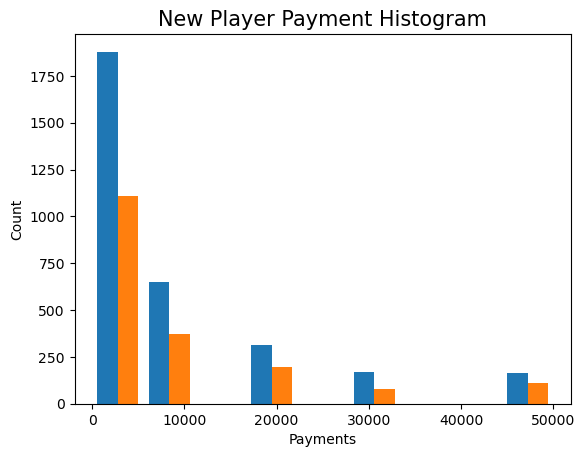

In [146]:
# 신규 고객들의 결제이력을 히스토그램으로 그리기
bins = np.linspace(0, 50000, 10) # 0에서 시작해서 50,000까지 10의 간격으로 x축을 설정합니다.
plt.xlabel("Payments")
plt.ylabel("Count")
plt.hist(total_payment, bins, label=['2022-02', '2022-03'])
plt.title("New Player Payment Histogram", fontsize=15)
plt.show()

In [148]:

123456
# Pandas, Numpy, Matplotlib, Seaborn을 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
실행 완료
sales_data 변수를 만들고 sales_6.csv 데이터를 불러와 각 데이터 값을 할당합니다. 위에서부터 5개의 데이터값을 확인해 볼까요?

12345
# sales_data 변수를 만들고 각 데이터 값을 할당
sales_data = pd.read_csv('~/aiffel/data_analysis_basic/data/sales_6.csv')

# 변수 sales_data의 head 값 확인하기
sales_data.head()
코드 실행 
Sales 데이터를 살펴보니 총 여섯 개 컬럼이 발견되었습니다.

고객들이 게임을 설치한 일자(install)
최종 로그기록(Time_stamp)
게임명(Game_Name)
상태(Status)
결제금액(Payment)
유저 아이디(Customer_ID)
우선 월별 게임 설치/플레이 횟수를 먼저 살펴보도록 하겠습니다.

Sales_data에 ‘date’열을 만들고, value_counts() 함수를 적용하면 쉽게 계산할 수 있습니다

123
# sales_data의 date열을 만들고 Time_stamp 값의 7번째 값까지 입력 
sales_data['date'] = sales_data['Time_stamp'].str[:7]
sales_data.head()
코드 실행 
1
sales_data['date'].value_counts()
코드 실행 
항목별 데이터가 얼마나 있는지 보여주는 countplot을 그려 봅시다.

12345678910
# 월별 고객 수 현황 시각화하기
ax = sns.countplot(data=sales_data, x='date')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
containers0 = ax.containers[-1]
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer By Month')

plt.show()
코드 실행 
우리 기업 고객 현황을 월별로 구분해보았습니다.
2월에 기록한 고객수는 49,380명, 3월은 50,465명으로 오히려 증가했네요.
매출은 줄었는데 고객이 늘었다니 이상합니다.

이번에는 각 게임별 고객 숫자를 한번 살펴보겠습니다.
게임별로 고객 숫자를 집계하기 위해서는 groupby()라는 함수가 사용됩니다.
groupby()는 pandas의 데이터프레임 중 특정 열을 기준으로 집계할 수 있습니다.
아래 코드는 순서대로 한번 읽어보면 다음과 같습니다.
'grouped 변수를 만들고 sales_data의 Status의 값을 sales_data의 date와 Game_Name을 기준으로 집계한 값을 할당해' 라는 의미입니다.
이 경우에는 집계 방식이 count이므로, date와 Game_Name 항목의 값을 기준으로 데이터를 묶은 다음 각 그룹에 속한 데이터 행의 개수를 세서 grouped 변수에 할당합니다.

123
# 월별 각 게임 고객 수 분류하기
grouped = sales_data['Status'].groupby([sales_data['date'], sales_data['Game_Name']]).count()
grouped
코드 실행 
이번에는 막대그래프를 그려 월별 각 게임 고객의 수를 시각화해보겠습니다.

123456789
# 월별 각 게임 고객 수 시각화하기
ax = sns.barplot(data=grouped.reset_index(), x='date', y='Status', hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer Count by Game')
plt.show()
코드 실행 
각 게임별로 고객 현황을 구분해보았습니다.
Mine Ground 고객은 2월에 27,721명, 3월 32,192명으로 증가했고,
Soccer Manager 고객은 2월에 21,659명, 3월 18,273명으로 감소했습니다.
Soccer Manager 고객 수만 감소한 원인이 있을까요?

우선은 전체 기업 입장의 분석에 집중해보도록 합시다.
이번에는 게임을 플레이한 고객과 인스톨한 고객으로 구분해보겠습니다.

12
# sales_data의 Status 열에 포함된 값들의 개수 세어보기
sales_data['Status'].value_counts()
코드 실행 
월별 플레이/인스톨한 고객의 현황을 countplot을 사용해 시각화해 볼까요?

123
# 코드를 직접 작성해 보세요. 
# hint: hue를 'Status'로 지정해 보세요. 
# [[YOUR CODE]]
코드 실행 
월별 플레이/인스톨 고객 현황 시각화하기

# 월별 플레이/인스톨 고객 현황 시각화하기
ax = sns.countplot(data=sales_data, x='date', hue='Status')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
containers0 = ax.containers[-1]
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer By Real Play')

plt.show()

이제 뭔가 윤곽이 드러나기 시작하는 것 같습니다.
인스톨한 고객이 기존 5,232명에서 9,792명으로 증가했지만 플레이한 고객은 44,148명에서 40,673명으로 감소했네요.

이번에는 월별 결제 건수를 한번 살펴보겠습니다.
12
temp_data = sales_data[sales_data['Payment'] !=0]
temp_data['date'].value_counts()
코드 실행 
123456
# 월별 결제 횟수 시각화하기
ax = sns.countplot(data=temp_data, x='date')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Payment Counts by Month')
plt.show()
코드 실행 
확실히 결제 건수가 많이 줄어든 것을 확인할 수 있습니다. 각 게임별 결제건수는 어떨까요?
Soccer Manager 고객 숫자가 줄었던것을 감안하면, Soccer Manager의 결제건수만 줄었을 것 같아요.

한 번 확인해보겠습니다.
우선 각 게임별 결제 건수를 확인하고 막대 그래프를 이용해 시각화해보겠습니다.

123
# 각 게임별 결제 건수 확인하기
grouped = temp_data['Payment'].groupby([temp_data['date'], temp_data['Game_Name']]).count()
grouped
코드 실행 
123456789
# 각 게임별 결제 건수 시각화하기
ax = sns.barplot(data=grouped.reset_index(), x='date', y='Payment', hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Payment Count By Game')
plt.show()
코드 실행 
이번에는 여러분이 직접 각 게임별 결제 금액을 확인하고, 막대 그래프로 시각화해보세요.

123
# 코드를 직접 작성해 보세요. 
# 각 게임별 결제 금액 확인하기
# [[YOUR CODE]]
코드 실행 
각 게임별 결제 금액 확인하기
# 각 게임별 결제 금액 확인하기
grouped = temp_data['Payment'].groupby([temp_data['date'], temp_data['Game_Name']]).sum()
grouped

123
# 코드를 직접 작성해 보세요. 
# 각 게임별 결제 금액 시각화하기
# [[YOUR CODE]]
코드 실행 
각 게임별 결제 금액 시각화하기
# 각 게임별 결제 금액 시각화하기
ax = sns.barplot(data=grouped.reset_index(), x='date', y='Payment', hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Payment Count By Game')
plt.show()
Mine Ground와 Soccer Manager 모두 결제 건수와 결제 금액이 줄어들었네요.
즉, 매출액이 줄어든 것에 대한 원인은 Soccer Manager의 고객 숫자가 줄어든 것보다
두 게임에서의 결제 인원이 줄어든 것이 더 큰 원인이라고 볼 수 있습니다.

이제 본격적으로 매출액에 영향을 주는 고객들을 정의하고 살펴보도록 하겠습니다.
123
# player_data변수를 만들고 sales_data에서 Status가 play인 고객들만 골라내 할당하기
player_data = sales_data[sales_data['Status'] == 'play']
player_data
코드 실행 
게임을 설치하고 한번이라도 플레이한 고객들은 총 84,821명인 것을 알 수 있습니다.
전체 고객 숫자가 99,845명이니까 플레이 비율은 약 84.9% 수준이네요.

이번에는 신규 고객과 기존 고객을 구분해보겠습니다.
1234
# plater_data에 install_date열을 만들고, install열 값의 7번째 값까지 입력
player_data = player_data.copy()
player_data['install_date'] = player_data['install'].str[:7]
player_data['play_date'] = player_data['Time_stamp'].str[:7]
코드 실행 
플레이한 고객들이 인스톨한 날과 비교해서

인스톨한 시기와 플레이한 시기가 같으면 신규 고객(New Player) 으로 정의하고,
인스톨한 시기와 플레이한 시기가 다르면 기존 고객(Existing) 으로 정의합니다.

여기서는 입력 배열의 요소를 확인하고, 특정 조건에 만족하는 값을 반환하는 함수인 Numpy의 np.where() 함수를 사용해 봅시다.

12
# plater_data에 type열을 만들고, install_date와 play_date열의 값이 같으면 New Player을 입력, 값이 다르면 Existing을 입력
player_data['type'] = np.where(player_data['install_date']==player_data['play_date'], 'New Player', 'Existing')
코드 실행 
123
# 월별 신규 고객과 기존 고객 현황 세어보기
grouped = player_data['Status'].groupby([player_data['play_date'], player_data['type']]).count()
grouped
코드 실행 
123456789
# 월별 신규 고객과 기존 고객 현황 시각화하기
ax = sns.countplot(data=player_data, x='play_date', hue="type")

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer Type By Month')
plt.show()
코드 실행 
기존 플레이 고객은 기존 28,668명에서 28,207명으로 461명이 감소했습니다.
그리고 신규 플레이 고객은 15,480명에서 12,466명으로 3,014명이 감소했네요.
플레이 인원이 줄어들고 있다는 것은 큰 문제네요.

이번에는 우리들의 주 관심사인 결제금액을 살펴보겠습니다.
groupby() 함수와 sum() 함수를 사용하여 월별 신규 고객과 기존 고객의 결제 현황을 나타내 보세요.

123
# 코드를 직접 작성해 보세요. 
# 월별 신규 고객과 기존 고객의 결제 현황 살펴보기
# [[YOUR CODE]]
코드 실행 
월별 신규 고객과 기존 고객의 결제 현황 살펴보기

# 월별 신규 고객과 기존 고객의 결제 현황 살펴보기
grouped = player_data['Payment'].groupby([player_data['play_date'], player_data['type']]).sum()
grouped
123456789
# 각 게임별 결제 금액 월별 시각화하기
ax = sns.barplot(data=grouped.reset_index(), x='play_date', y='Payment', hue='type')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer Type By Month')
plt.show()
코드 실행 
이번에는 누적막대 그래프를 사용해서 월별 신규 고객과 기존 고객의 결제 현황을 시각화해보겠습니다.
이때 사용되는 grouped 변수는 멀티 인덱스로서 unstack()함수를 이용해 일반 인덱스로 변경해야 합니다. 그 다음 plot()함수에서 stacked=True 인자를 설정해야 누적막대 그래프가 그려집니다.

12345678910
#월별 신규 고객과 기존 고객의 결제 현황 시각화하기(누적막대 보기)
ax = grouped.unstack().plot(kind='bar', stacked=True, grid=False, figsize=[6,6])

containers = ax.containers[-1]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
containers0 = ax.containers[-2]
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('Payment by Type')
plt.show()
코드 실행 
우선 기존 고객이 결제한 금액은 50,140,500원 동일합니다.
하지만 신규 고객이 결제한 금액은 기존 30,701,300원에서 18,220,700원으로 약 40% 수준이 감소했네요.
동 기간에 신규 고객이 줄어든 수치는 3014명으로 약 19%수준이 줄어든 것을 감안하더라도
한 달만에 이렇게나 큰 비중이 줄어든 것은 우리 기업에게 치명적입니다.
서둘러 대책을 마련해야할 것 같아요.

신규 고객들이 결제한 금액을 보고 대응 전략을 마련해보도록 합시다.
먼저 play_date의 인덱스를 type으로 지정해 봅시다.

123
# play_date의 인덱스를 type으로 지정하기
payment_data = player_data.set_index('type', drop=True)
payment_data
코드 실행 
데이터에서 기존 고객은 삭제하고, 신규 고객만 남겨보겠습니다. drop() 함수를 사용해 인덱스에서 Existing을 삭제하면 됩니다.

12
# 인덱스에서 Existing을 삭제하고 신규 고객들만 남기기
payment_data.drop('Existing', inplace=True)
코드 실행 
신규 고객 중 결제 이력이 있는 고객만 남깁니다.
이를 위해 payment_data의 인덱스를 Payment로 지정하고, 인덱스에서 0을 삭제해야 합니다.
그 후 인덱스를 리셋해서 다시 payment 열을 본래의 데이터프레임으로 포함시켜줍니다.
만약 인덱스를 리셋하지 않으면 payment 열을 사용할 수 없게 됩니다.

123456
# payment_data의 인덱스를 Payment로 지정하기
payment_data = payment_data.set_index('Payment')

# Payment_data의 인덱스에서 0을 삭제하고 결제 이력이 있는 고객만 남기기
payment_data.drop(0, inplace=True)
payment_data = payment_data.reset_index()
코드 실행 
이제 신규 고객의 결제 이력을 월별로 구분하고, 구분된 월별 데이터를 하나로 합쳐 줍니다.

123456
# 고객의 결제이력을 월별로 구분하기
payment_data_02 = payment_data.set_index('play_date').loc['2022-02'].Payment.values
payment_data_03 = payment_data.set_index('play_date').loc['2022-03'].Payment.values

# 월별 데이터를 하나로 합치기
total_payment = np.array([payment_data_02, payment_data_03],dtype=object,)
코드 실행 
마지막으로 신규 고객들의 결제이력을 히스토그램으로 그려 봅시다.
히스토그램의 x축 간격은 보통 자동으로 설정됩니다.
하지만 우리가 히스토그램을 그릴때 사용하는 데이터인 고객의 결제는
작게는 900원, 많게는 49,900원까지 그 간격 차이가 크게 납니다.
따라서 우리들은 numpy라이브러리의 linspace() 함수를 사용해 x축의 간격을 설정하도록 하겠습니다.

1234567
# 신규 고객들의 결제이력을 히스토그램으로 그리기
bins = np.linspace(0, 50000, 10) # 0에서 시작해서 50,000까지 10의 간격으로 x축을 설정합니다.
plt.xlabel("Payments")
plt.ylabel("Count")
plt.hist(total_payment, bins, label=['2022-02', '2022-03'])
plt.title("New Player Payment Histogram", fontsize=15)
plt.show()
코드 실행 
신규고객들의 경우, 모든 금액대에서 결제건수가 줄었습니다.
그럼 신규 고객들만 그럴까요?

기존 고객들의 결제 건수를 확인해보도록 합시다.
이번에는 여러분이 직접 코드를 짜보세요.

1234567891011121314151617181920212223
# 코드를 직접 작성해 보세요. 


# play_date의 인덱스를 type으로 지정하기
# [[YOUR CODE]]

# 인덱스에서 New_player을 삭제하고 기존 고객들만 남기기
# [[YOUR CODE]]

# payment_data의 인덱스를 Payment로 지정하기

코드 실행 
기존 고객들의 결제 건수 확인
# play_date의 인덱스를 type으로 지정하기
payment_data = player_data.set_index('type', drop=True)

# 인덱스에서 New_player을 삭제하고 기존 고객들만 남기기
payment_data.drop('New Player', inplace=True)

# payment_data의 인덱스를 Payment로 지정하기
payment_data = payment_data.set_index('Payment')

# Payment_data의 인덱스에서 0을 삭제하고 결제 이력이 있는 고객만 남기기
payment_data.drop(0, inplace=True)
payment_data = payment_data.reset_index()

# 고객의 결제이력을 월별로 구분하기
payment_data_02 = payment_data.set_index('play_date').loc['2022-02'].Payment.values
payment_data_03 = payment_data.set_index('play_date').loc['2022-03'].Payment.values

# 월별 데이터를 하나로 합치기
total_payment = np.array([payment_data_02, payment_data_03],dtype=object,)

# 신규 고객들의 결제이력을 히스토그램으로 그리기
bins = np.linspace(0, 50000, 10)
plt.xlabel("Payments")
plt.ylabel("Count")
plt.hist(total_payment, bins, label=['2022-02', '2022-03'])
plt.title("New Player Payment Histogram", fontsize=15)
plt.show()


SyntaxError: invalid syntax (<ipython-input-148-5736ce5a99c4>, line 8)

머라ㅡㄴ거야 꺼져
